# LOADING DATASET

In [ ]:
import pandas as pd
df=pd.read_csv('/content/heart.csv')

# 1.EXPLORATORY DATA ANALYSIS

In [ ]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
df.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [ ]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [ ]:
df.shape

(918, 12)

In [ ]:
df.nunique()

,0
Age,50
Sex,2
ChestPainType,4
RestingBP,67
Cholesterol,222
FastingBS,2
RestingECG,3
MaxHR,119
ExerciseAngina,2
Oldpeak,53


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
df.isnull().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


# 2.DATA PROCESSING

### 2.1 DIVING INTO NUMERICAL AND CATEGORICAL DATA

In [ ]:
col = list(df.columns)
categorical_features = []
numerical_features = []
for i in col:
    if len(df[i].unique()) > 4:
        numerical_features.append(i)
    else:
        categorical_features.append(i)

print('Categorical Features :',*categorical_features)
print('Numerical Features :',*numerical_features)

Categorical Features : Sex ChestPainType FastingBS RestingECG ExerciseAngina ST_Slope HeartDisease
Numerical Features : Age RestingBP Cholesterol MaxHR Oldpeak


### 2.2 LABEL ENCODING/ORDINAL ENCODING

In [ ]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler, StandardScaler

In [ ]:
label_encoders = {
    'Sex': LabelEncoder(),
    'ExerciseAngina': LabelEncoder(),
    'FastingBS': LabelEncoder(),
}

In [ ]:
for col, encoder in label_encoders.items():
    df[col] = encoder.fit_transform(df[col])

    print(f"Label Encoding applied to {col}:")
    print(df[[col]].head())
    print("-" * 50)

Label Encoding applied to Sex:
   Sex
0    1
1    0
2    1
3    0
4    1
--------------------------------------------------
Label Encoding applied to ExerciseAngina:
   ExerciseAngina
0               0
1               0
2               0
3               1
4               0
--------------------------------------------------
Label Encoding applied to FastingBS:
   FastingBS
0          0
1          0
2          0
3          0
4          0
--------------------------------------------------


### 2.3 ONE-HOT ENCODING

In [ ]:
df = pd.get_dummies(df, columns=['ChestPainType', 'ST_Slope', 'RestingECG'], drop_first=True).astype(int)

print("Columns after One-Hot Encoding:")
print(df.columns)
print("-" * 50)

Columns after One-Hot Encoding:
Index(['Age', 'Sex', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR',
       'ExerciseAngina', 'Oldpeak', 'HeartDisease', 'ChestPainType_ATA',
       'ChestPainType_NAP', 'ChestPainType_TA', 'ST_Slope_Flat', 'ST_Slope_Up',
       'RestingECG_Normal', 'RestingECG_ST'],
      dtype='object')
--------------------------------------------------


In [ ]:
df.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,ST_Slope_Flat,ST_Slope_Up,RestingECG_Normal,RestingECG_ST
0,40,1,140,289,0,172,0,0,0,1,0,0,0,1,1,0
1,49,0,160,180,0,156,0,1,1,0,1,0,1,0,1,0
2,37,1,130,283,0,98,0,0,0,1,0,0,0,1,0,1
3,48,0,138,214,0,108,1,1,1,0,0,0,1,0,1,0
4,54,1,150,195,0,122,0,0,0,0,1,0,0,1,1,0


### 2.4 DISTRIBUTION

Distribution of Categorial Features

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

<ipython-input-18-43e3c58b6f70>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, ax=axes[i], palette="Set2")
<ipython-input-18-43e3c58b6f70>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, ax=axes[i], palette="Set2")
<ipython-input-18-43e3c58b6f70>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, ax=axes[i], palette="Set2")
<ipython-input-18-43e3c58b6f70>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the

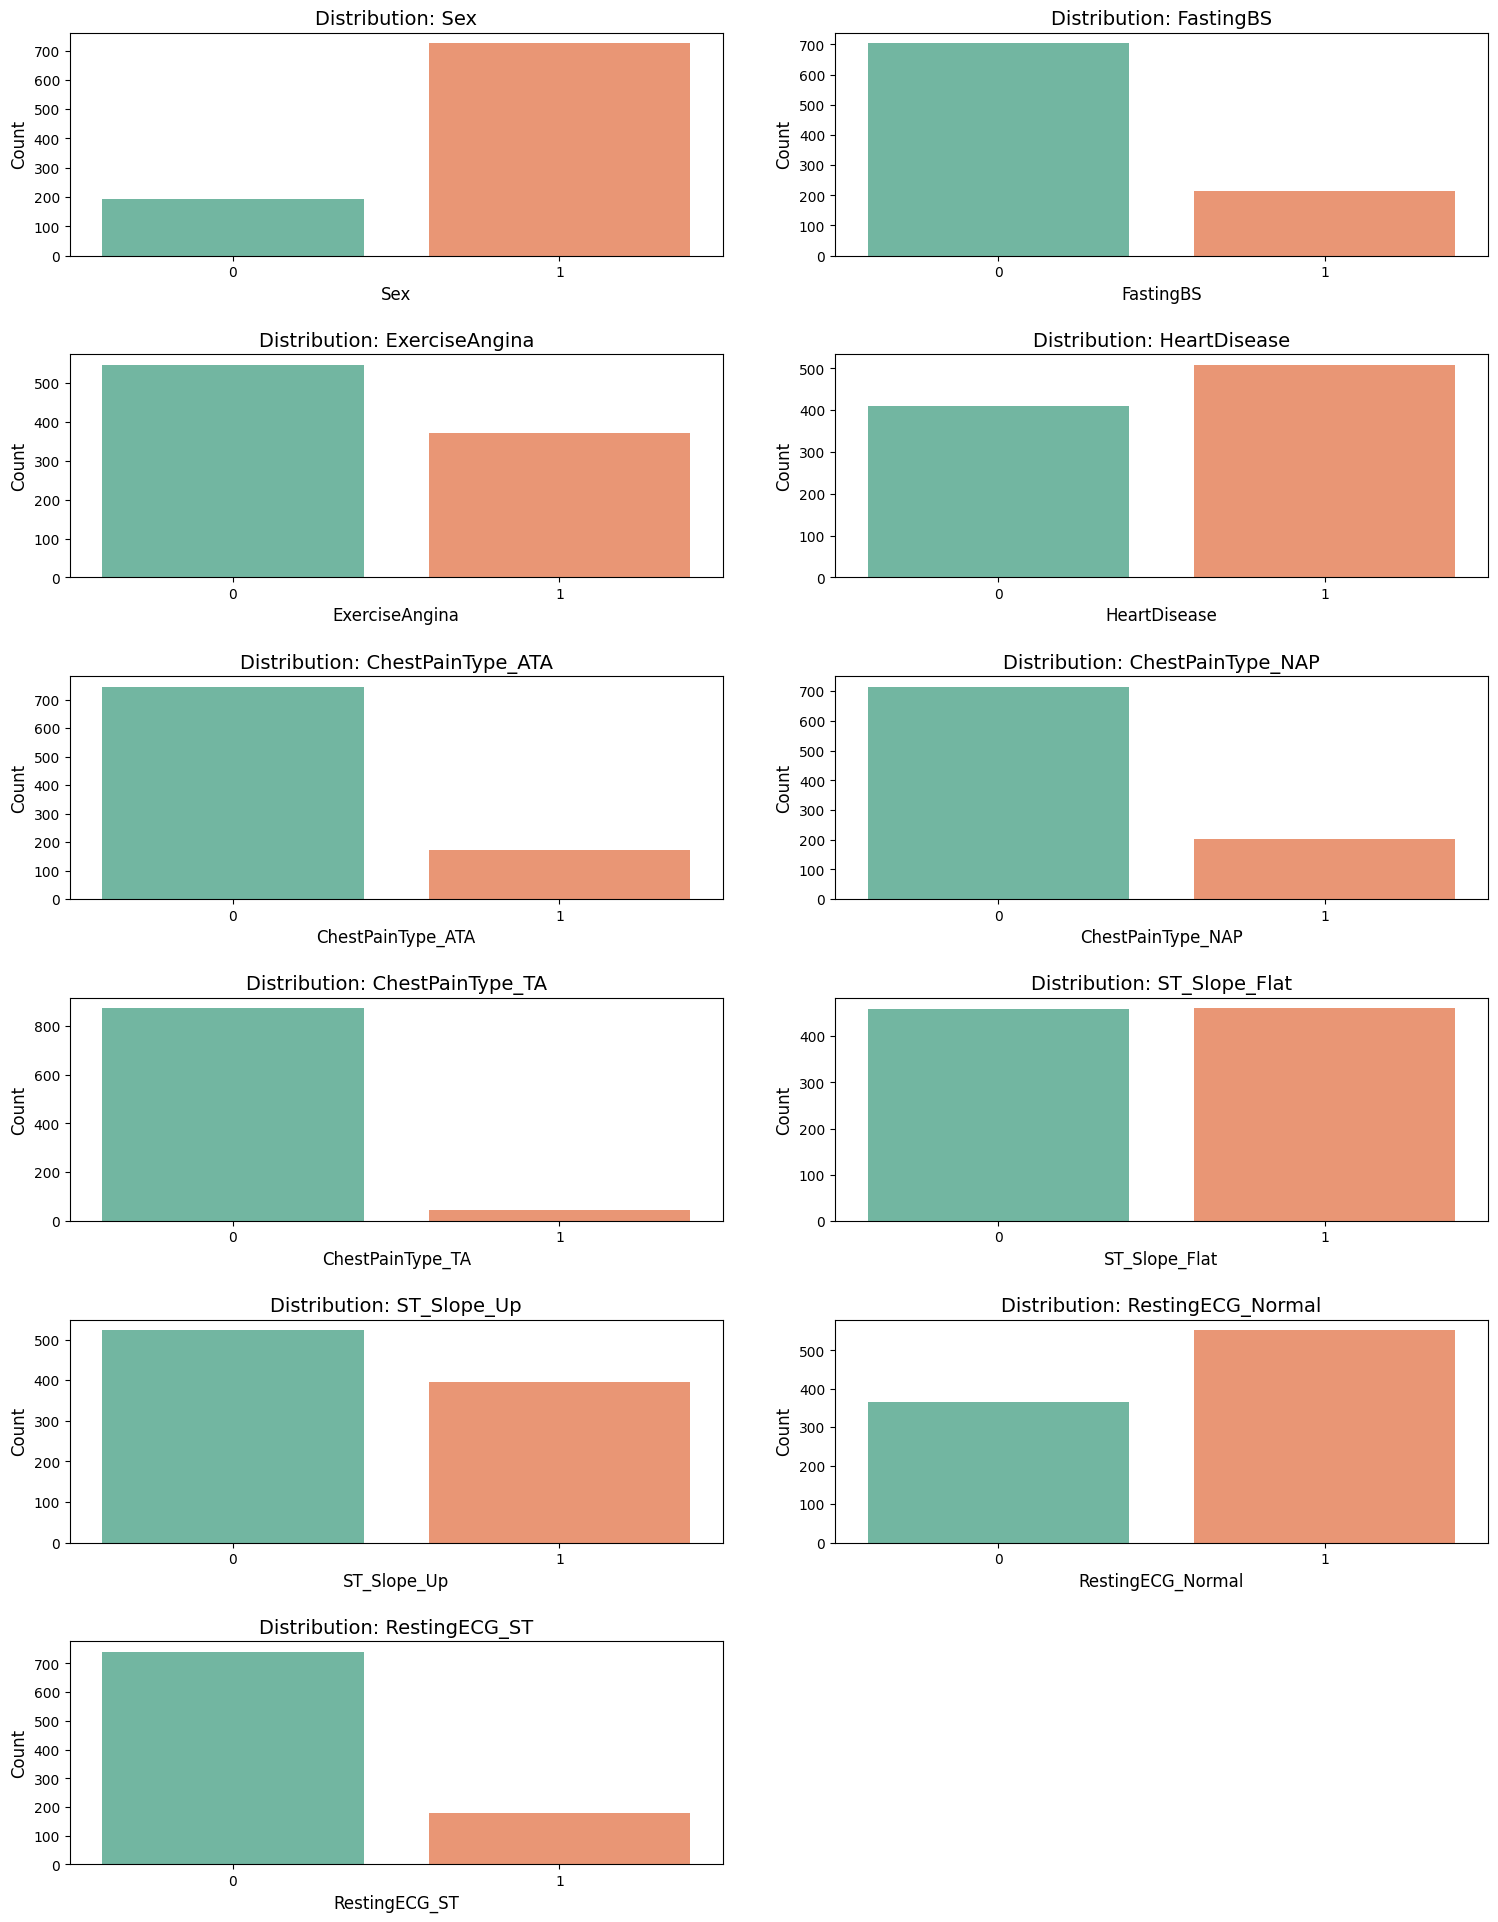

In [ ]:
categorical_features = ['Sex', 'FastingBS', 'ExerciseAngina', 'HeartDisease',
                        'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA',
                        'ST_Slope_Flat', 'ST_Slope_Up', 'RestingECG_Normal', 'RestingECG_ST']
fig, ax = plt.subplots(nrows=(len(categorical_features) + 1) // 2, ncols=2, figsize=(16, 20))
fig.tight_layout(pad=5.0)
axes = ax.flatten()

for i, feature in enumerate(categorical_features):
    if feature in df.columns:
        sns.countplot(data=df, x=feature, ax=axes[i], palette="Set2")
        axes[i].set_title(f'Distribution: {feature}', fontsize=14)
        axes[i].set_xlabel(feature, fontsize=12)
        axes[i].set_ylabel('Count', fontsize=12)

for j in range(len(categorical_features), len(axes)):
    fig.delaxes(axes[j])
plt.show()

Distribution for numerical features


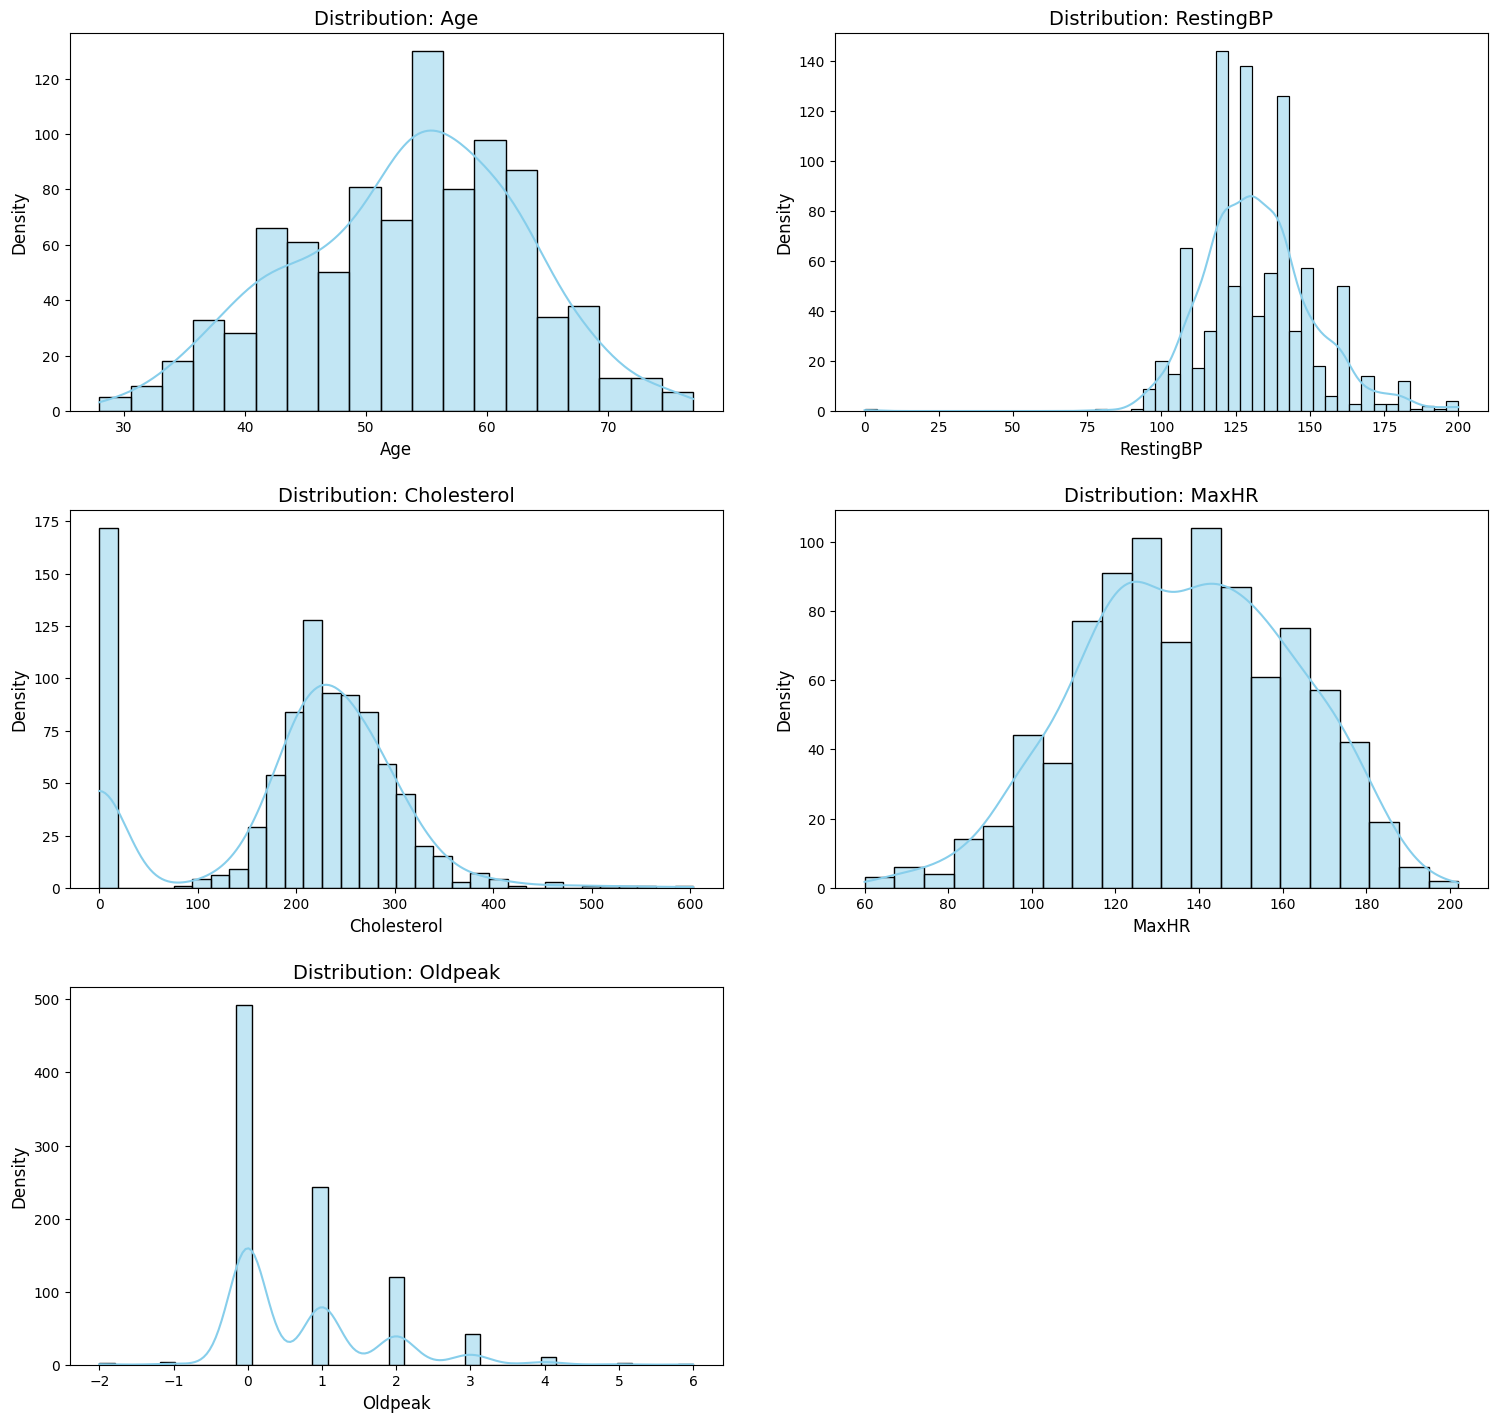

In [ ]:
numerical_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']


fig, ax = plt.subplots(nrows=(len(numerical_features) + 1) // 2, ncols=2, figsize=(16, 15))
fig.tight_layout(pad=5.0)
axes = ax.flatten()

for i, feature in enumerate(numerical_features):
    sns.histplot(data=df, x=feature, kde=True, ax=axes[i], color="skyblue")
    axes[i].set_title(f'Distribution: {feature}', fontsize=14)
    axes[i].set_xlabel(feature, fontsize=12)
    axes[i].set_ylabel('Density', fontsize=12)

for j in range(len(numerical_features), len(axes)):
    fig.delaxes(axes[j])

plt.show()

Categorical Features vs Target Variable (HeartDisease)

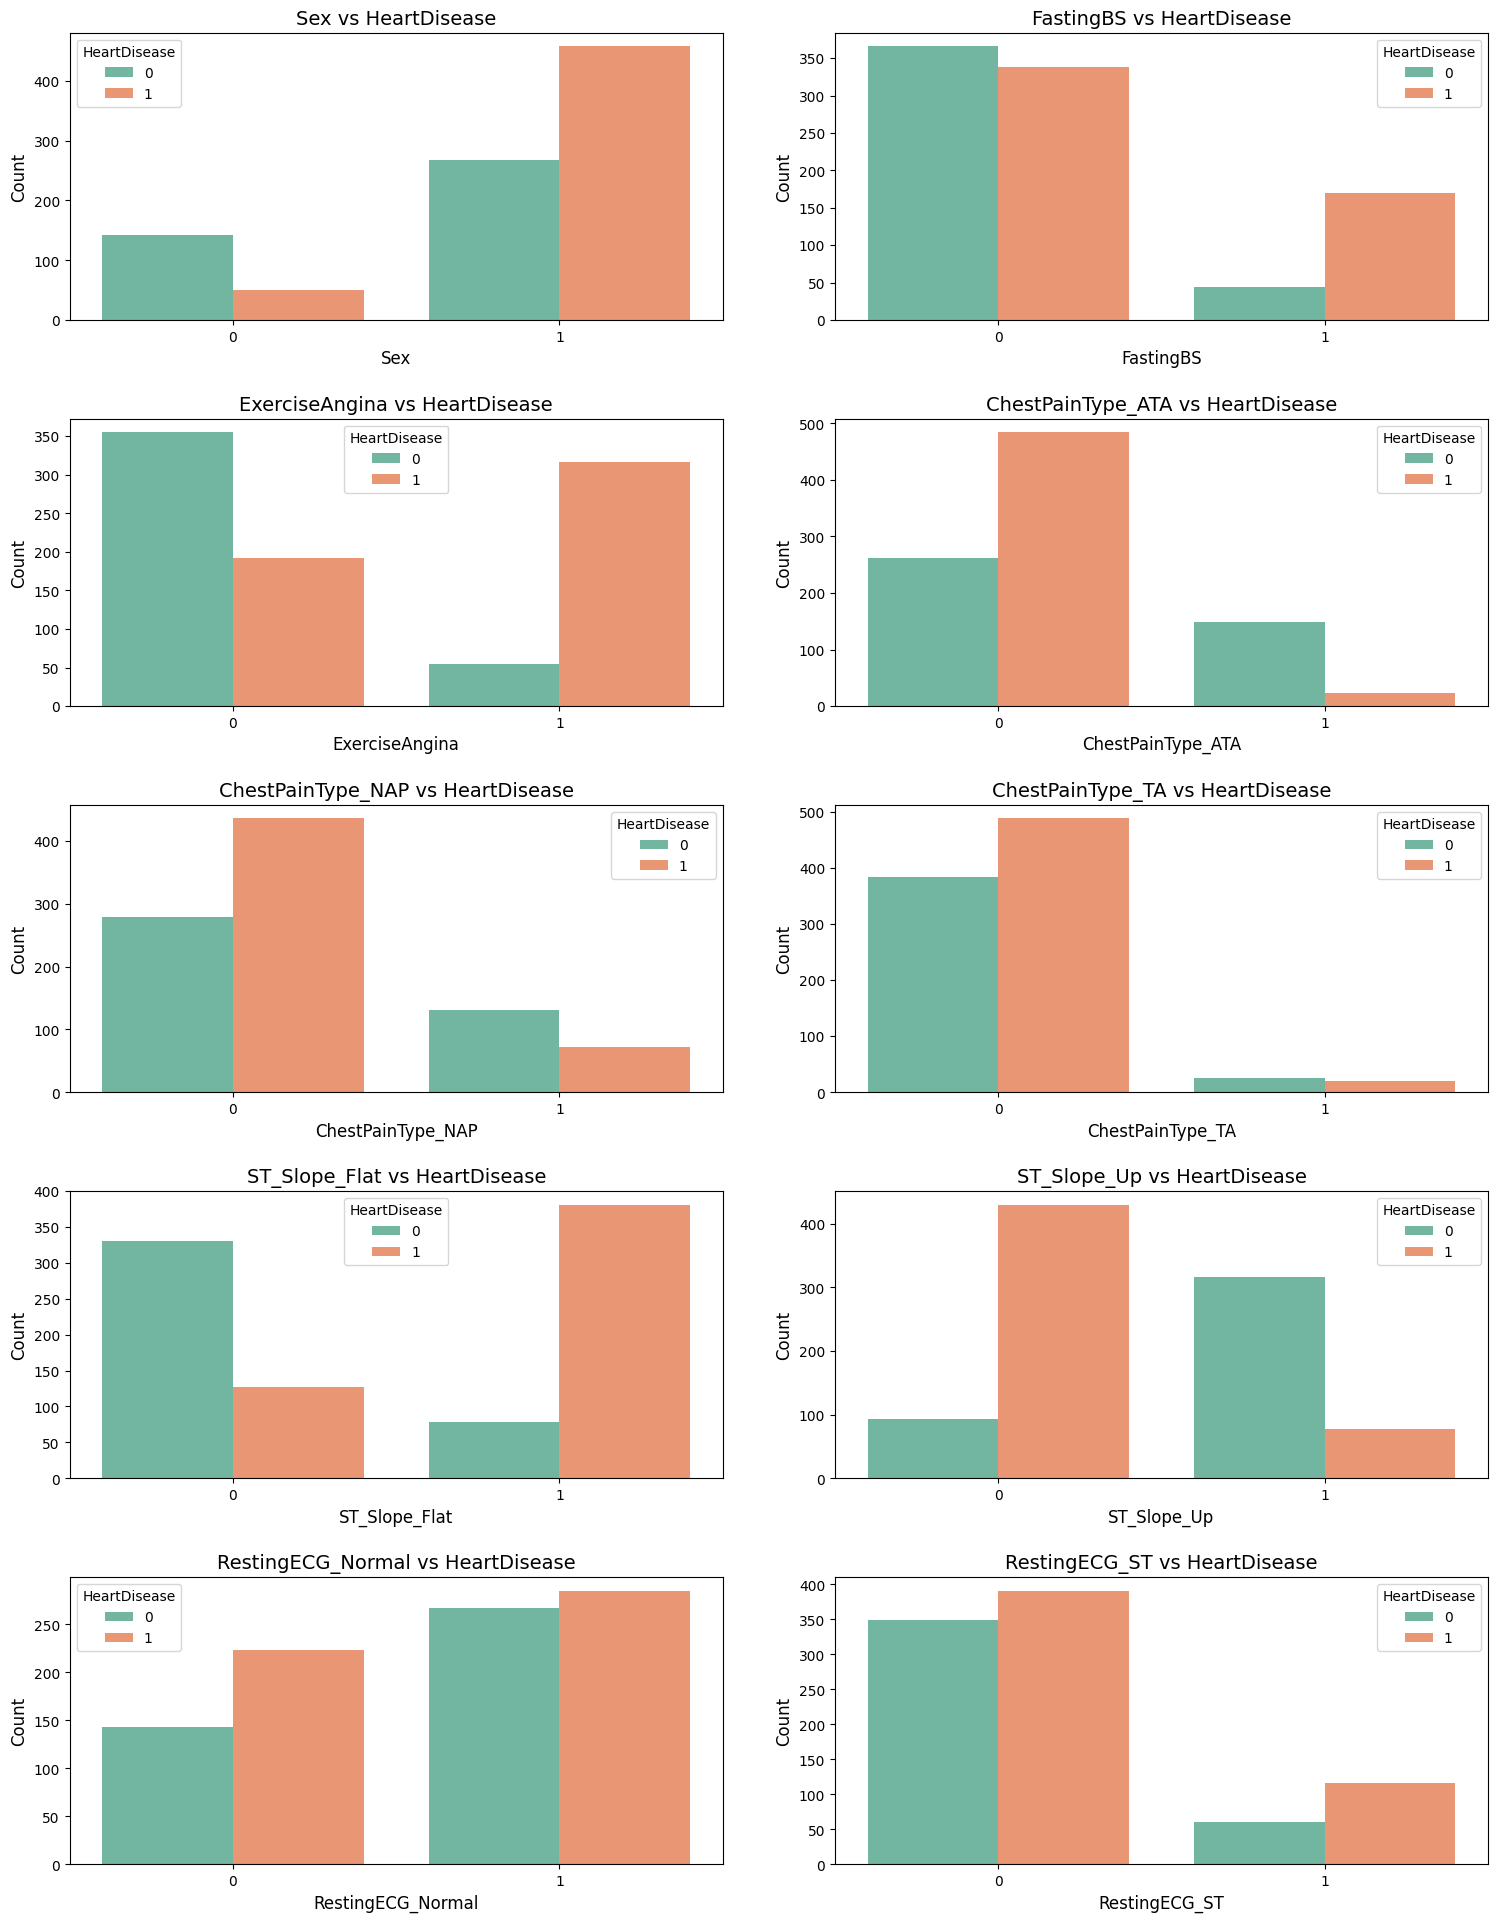

In [ ]:
import matplotlib.pyplot as plt
categorical_features = ['Sex', 'FastingBS', 'ExerciseAngina',
                        'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA',
                        'ST_Slope_Flat', 'ST_Slope_Up', 'RestingECG_Normal', 'RestingECG_ST']

fig, ax = plt.subplots(nrows=(len(categorical_features) + 1) // 2, ncols=2, figsize=(16, 20))
fig.tight_layout(pad=5.0)
axes = ax.flatten()

for i, feature in enumerate(categorical_features):
    if feature in df.columns:
        sns.countplot(data=df, x=feature, hue='HeartDisease', ax=axes[i], palette="Set2")
        axes[i].set_title(f'{feature} vs HeartDisease', fontsize=14)
        axes[i].set_xlabel(feature, fontsize=12)
        axes[i].set_ylabel('Count', fontsize=12)

for j in range(len(categorical_features), len(axes)):
    fig.delaxes(axes[j])

plt.show()

Categorical Features vs Positive Heart Disease Cases

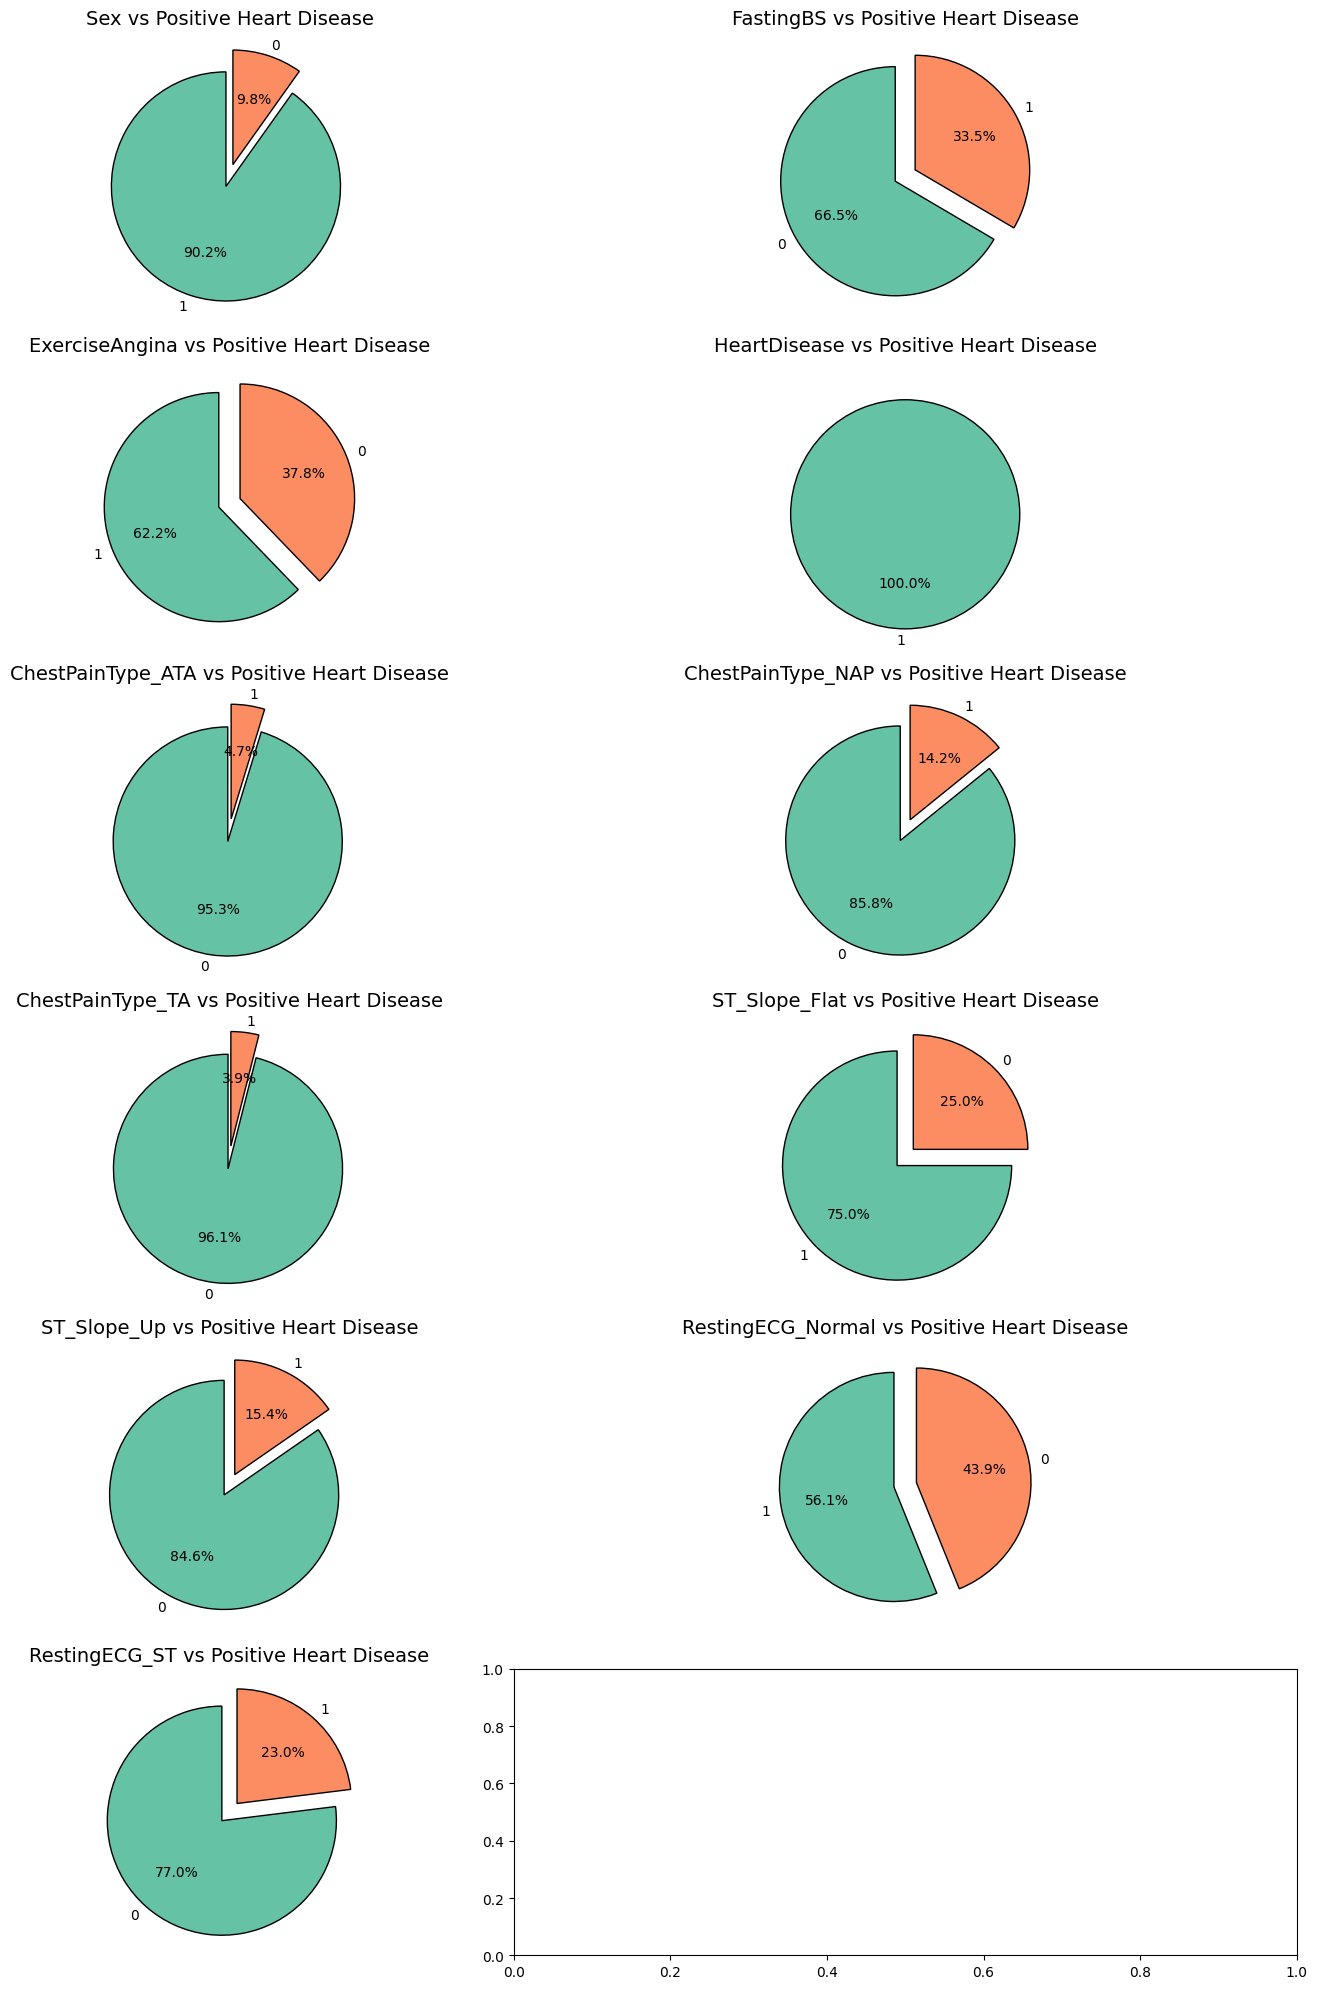

In [ ]:
positive_cases = df[df['HeartDisease'] == 1]
categorical_features = ['Sex', 'FastingBS', 'ExerciseAngina', 'HeartDisease',
                        'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA',
                        'ST_Slope_Flat', 'ST_Slope_Up', 'RestingECG_Normal', 'RestingECG_ST']
fig, ax = plt.subplots(nrows=6, ncols=2, figsize=(15, 20))

# Define colors for the pie charts
# Example: using a color palette from seaborn
colors = sns.color_palette('Set2', n_colors=len(categorical_features))

for i, feature in enumerate(categorical_features):

    feature_data = df[df['HeartDisease'] == 1][feature].value_counts()

    feature_percentages = feature_data / feature_data.sum() * 100
    plt.subplot(6, 2, i + 1)
    plt.pie(feature_percentages, labels=feature_percentages.index, autopct='%1.1f%%', startangle=90,
            explode=(0.1,) * len(feature_percentages), colors=colors,
            wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})
    plt.title(f'{feature} vs Positive Heart Disease', fontsize=14)

plt.tight_layout()
plt.show()

Numerical Features vs heart disease

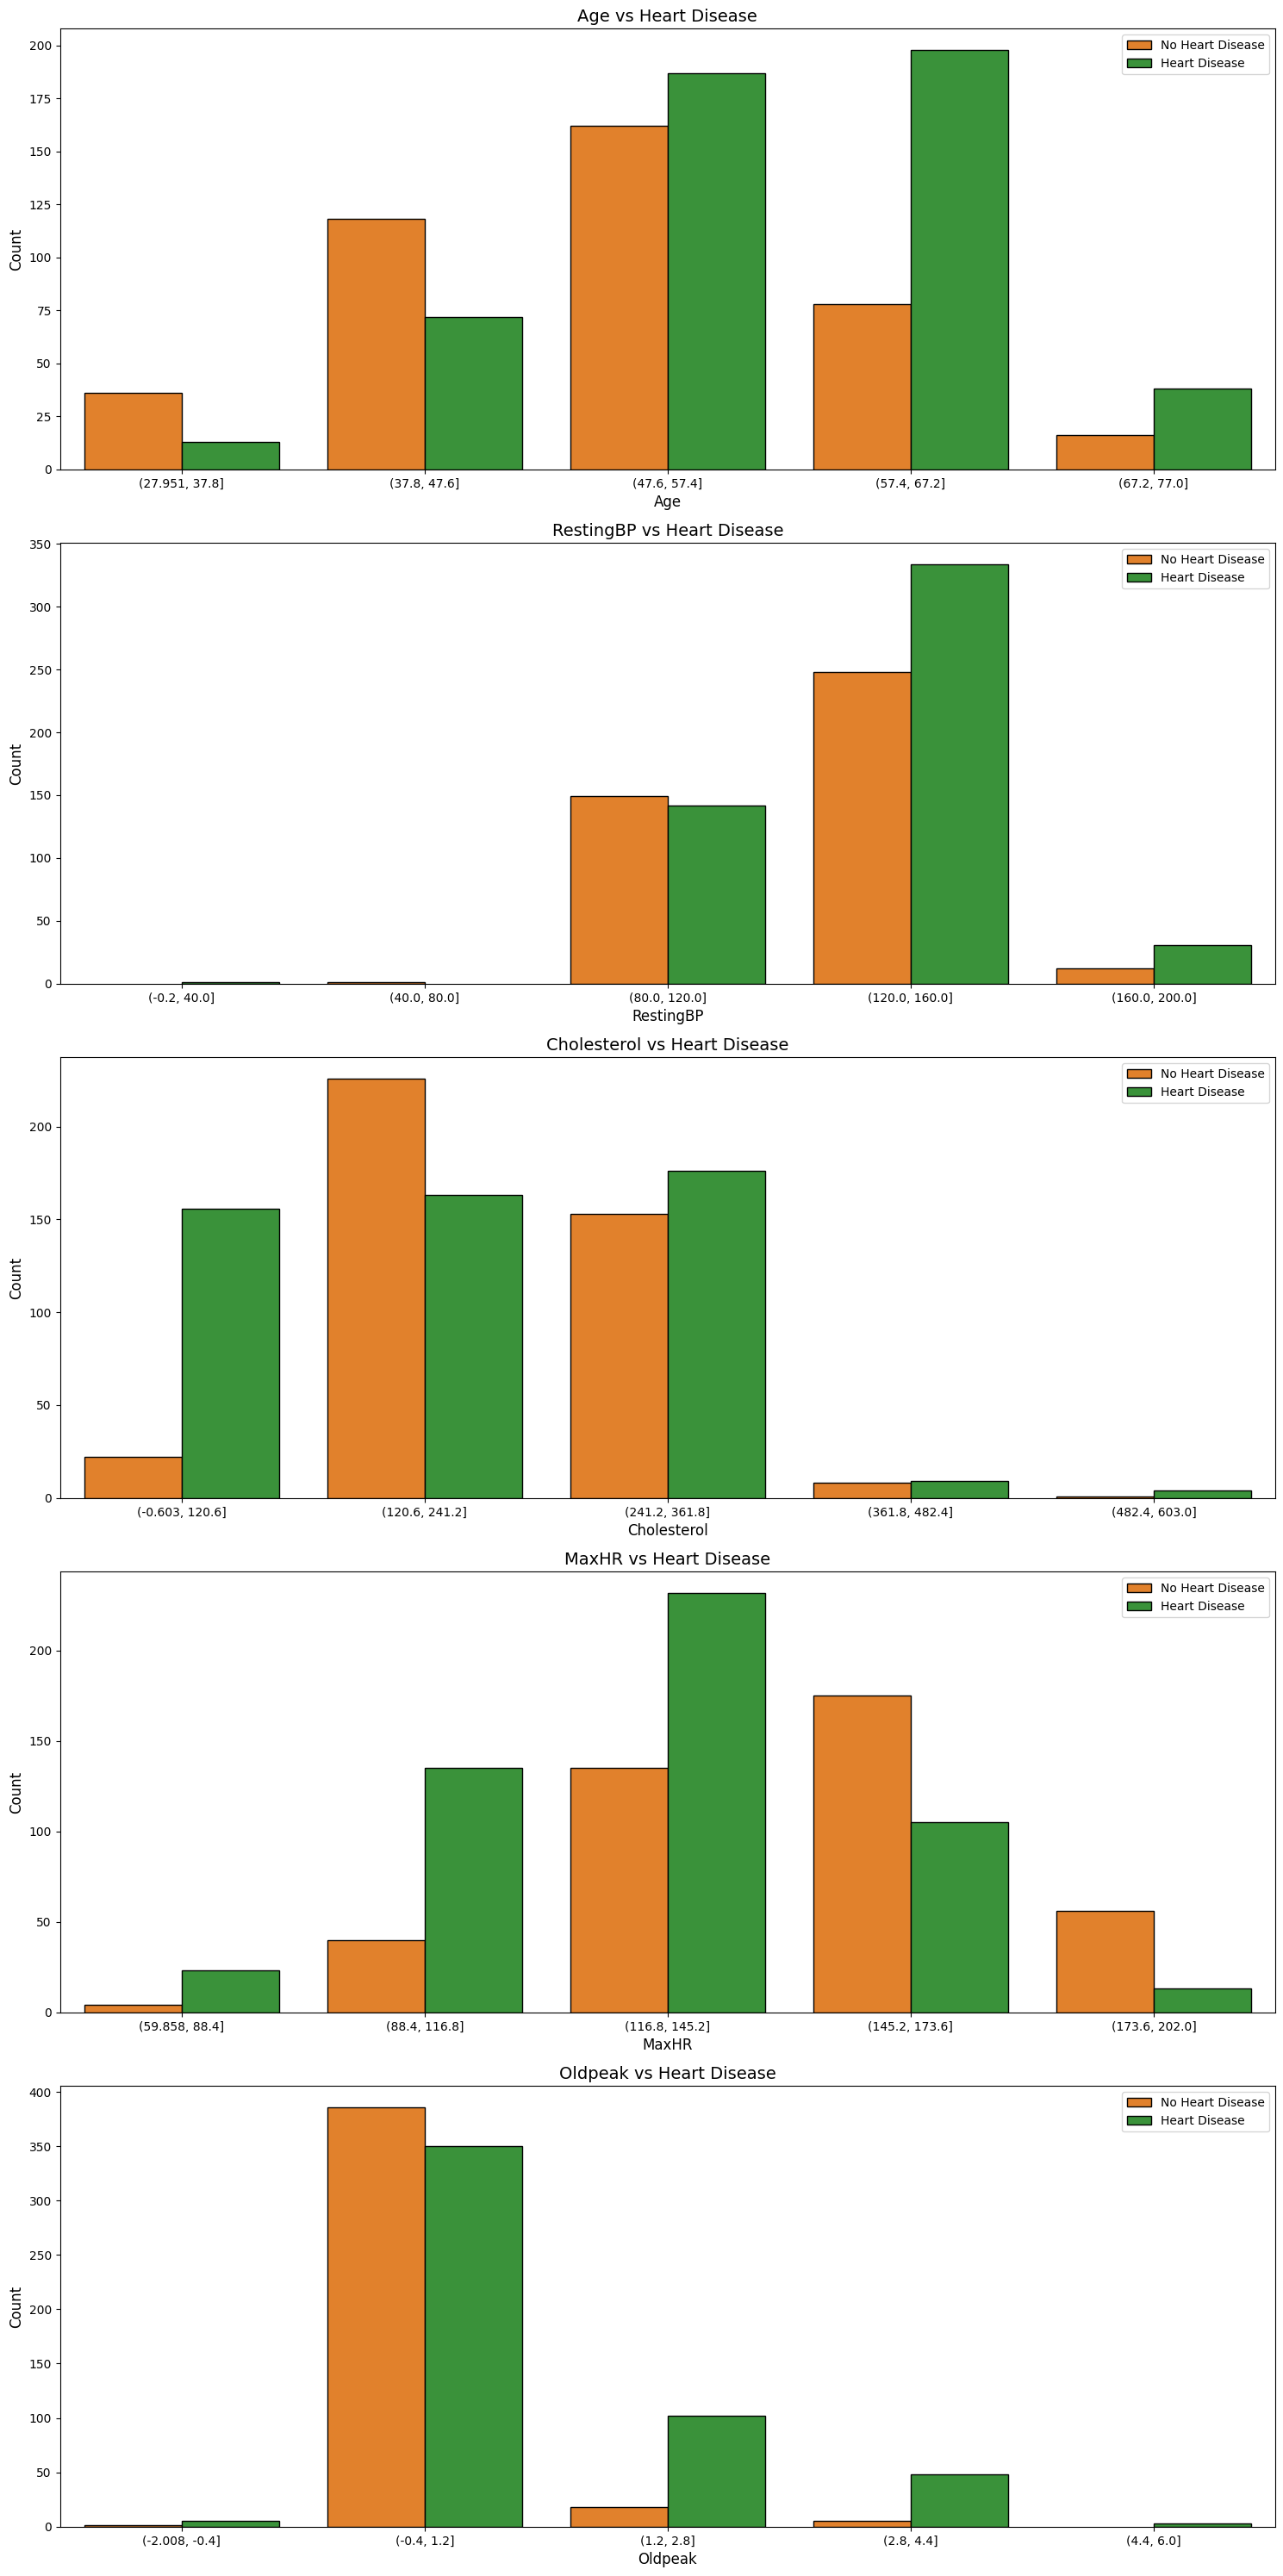

In [ ]:
numerical_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

colors = ['#ff7f0e', '#2ca02c']

fig, ax = plt.subplots(nrows=5, ncols=1, figsize=(15, 30))

# Loop through numerical features and plot countplots
for i in range(len(numerical_features)):
    feature = numerical_features[i]

    # Convert numerical feature to categorical by binning the values
    df[feature + '_bin'] = pd.cut(df[feature], bins=5)  # Binning into 5 categories

    # Plot countplot with hue = HeartDisease
    plt.subplot(5, 1, i + 1)
    sns.countplot(x=feature + '_bin', data=df, hue='HeartDisease', palette=colors, edgecolor='black')
    plt.title(f'{feature} vs Heart Disease', fontsize=14)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.legend(['No Heart Disease', 'Heart Disease'])

plt.tight_layout()
plt.show()

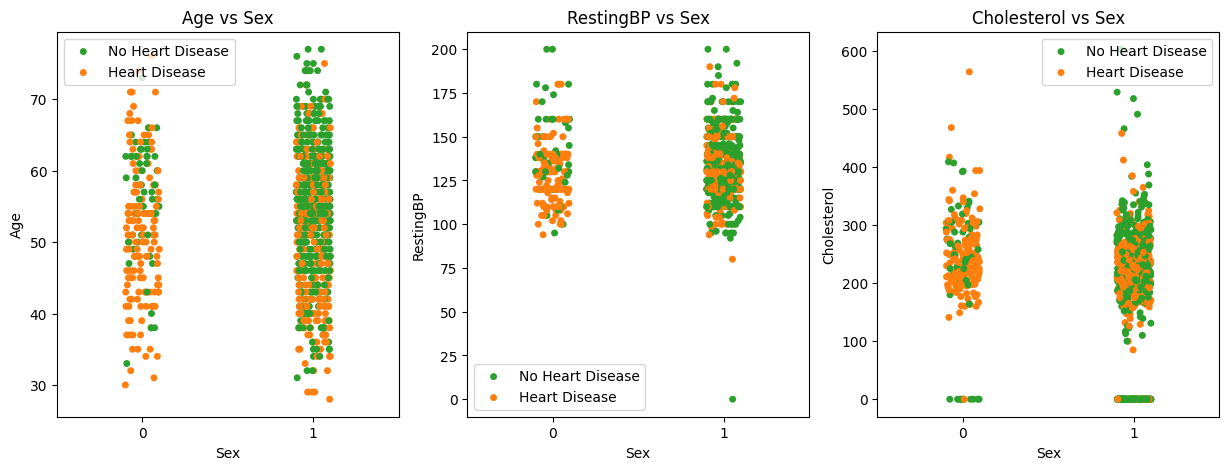

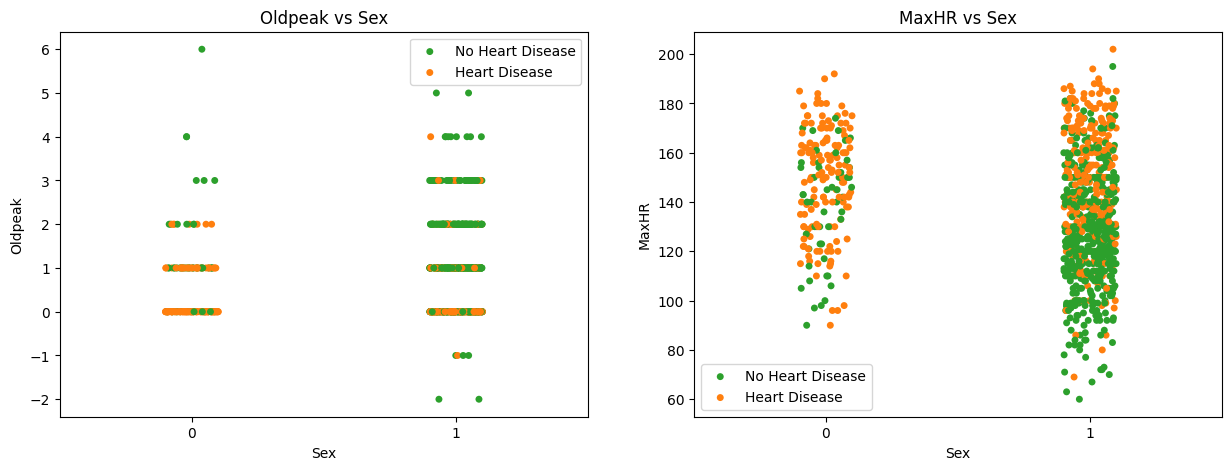

In [ ]:
fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    sns.stripplot(x = 'Sex',y = numerical_features[i],data = df,hue = 'HeartDisease',palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs Sex'
    plt.title(title);

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))
for i in [-1,-2]:
    plt.subplot(1,2,-i)
    sns.stripplot(x = 'Sex',y = numerical_features[i],data = df,hue = 'HeartDisease',palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs Sex'
    plt.title(title);

Data Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
numerical_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

scaler = MinMaxScaler(feature_range=(-1, 1))
df[numerical_features] = scaler.fit_transform(df[numerical_features])

print("Scaled numerical features")
print(df[numerical_features].head())

Scaled numerical features
        Age  RestingBP  Cholesterol     MaxHR  Oldpeak
0 -0.510204       0.40    -0.041459  0.577465    -0.50
1 -0.142857       0.60    -0.402985  0.352113    -0.25
2 -0.632653       0.30    -0.061360 -0.464789    -0.50
3 -0.183673       0.38    -0.290216 -0.323944    -0.25
4  0.061224       0.50    -0.353234 -0.126761    -0.50


In [ ]:
df.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,ST_Slope_Flat,ST_Slope_Up,RestingECG_Normal,RestingECG_ST
0,-0.510204,1,0.40,-0.041459,0,0.577465,0,-0.50,0,1,0,0,0,1,1,0
1,-0.142857,0,0.60,-0.402985,0,0.352113,0,-0.25,1,0,1,0,1,0,1,0
2,-0.632653,1,0.30,-0.061360,0,-0.464789,0,-0.50,0,1,0,0,0,1,0,1
3,-0.183673,0,0.38,-0.290216,0,-0.323944,1,-0.25,1,0,0,0,1,0,1,0
4,0.061224,1,0.50,-0.353234,0,-0.126761,0,-0.50,0,0,1,0,0,1,1,0


### 2.4 FEATURE SELECTION

FEATURE(X) AND TARGET(Y)

In [ ]:
X = df.drop(columns=['HeartDisease'])
y = df['HeartDisease']

print("Shape of features (X) and target (y):")
print(f"X shape: {X.shape}, y shape: {y.shape}")

Shape of features (X) and target (y):
X shape: (918, 15), y shape: (918,)


FEATURE SELECTION OF THE CATEGORICAL DATA

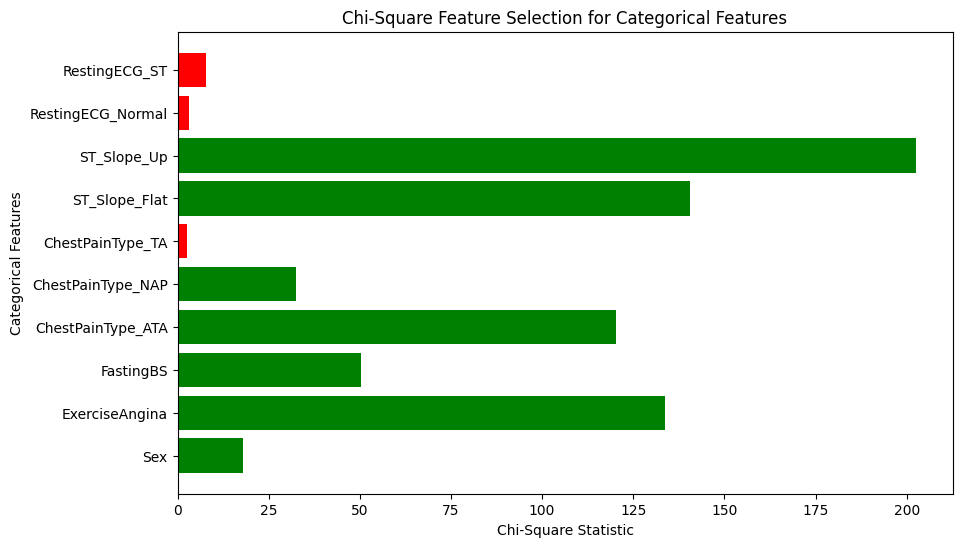

Categorical Feature Selection using Chi-Square Test:
Sex: Chi2 Stat = 18.006243160731916
ExerciseAngina: Chi2 Stat = 133.64013403064604
FastingBS: Chi2 Stat = 50.296983033264
ChestPainType_ATA: Chi2 Stat = 120.34949351195758
ChestPainType_NAP: Chi2 Stat = 32.427756496796185
ChestPainType_TA: Chi2 Stat = 2.617720292916725
ST_Slope_Flat: Chi2 Stat = 140.63532873806997
ST_Slope_Up: Chi2 Stat = 202.44718205531498
RestingECG_Normal: Chi2 Stat = 3.069601435358755
RestingECG_ST: Chi2 Stat = 7.778755154578002


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import LabelEncoder

categorical_features = ['Sex', 'ExerciseAngina', 'FastingBS', 'ChestPainType_ATA', 'ChestPainType_NAP',
                        'ChestPainType_TA', 'ST_Slope_Flat', 'ST_Slope_Up', 'RestingECG_Normal', 'RestingECG_ST']

X_cat = df[categorical_features]
y = df['HeartDisease']
chi2_selector = SelectKBest(chi2, k='all')
chi2_selector.fit(X_cat, y)

plt.figure(figsize=(10, 6))
plt.barh(categorical_features, chi2_selector.scores_, color=['red' if score < 10 else 'green' for score in chi2_selector.scores_])
plt.xlabel('Chi-Square Statistic')
plt.ylabel('Categorical Features')
plt.title('Chi-Square Feature Selection for Categorical Features')
plt.show()

print("Categorical Feature Selection using Chi-Square Test:")
for i, feature in enumerate(categorical_features):
    print(f"{feature}: Chi2 Stat = {chi2_selector.scores_[i]}")

FEATURE SELECTION FOR NUMERICAL DATA

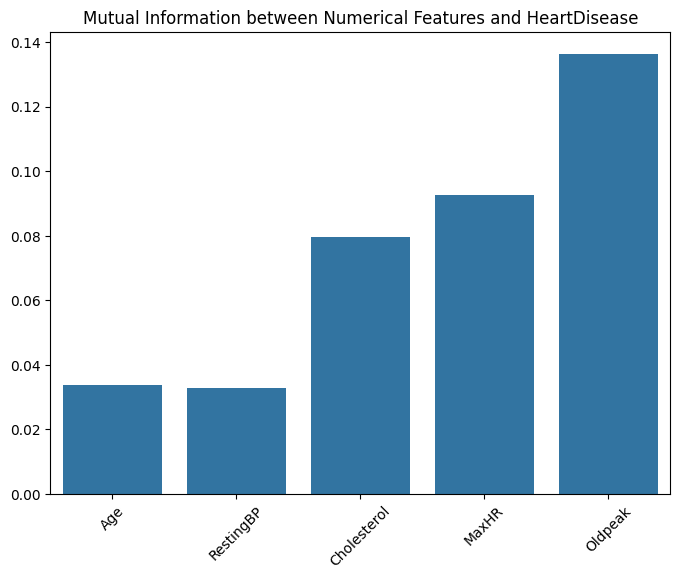

Age: Mutual Information = 0.0339
RestingBP: Mutual Information = 0.0327
Cholesterol: Mutual Information = 0.0796
MaxHR: Mutual Information = 0.0928
Oldpeak: Mutual Information = 0.1363


In [ ]:
from sklearn.feature_selection import mutual_info_classif
import seaborn as sns
import matplotlib.pyplot as plt

mi = mutual_info_classif(df[numerical_features], df['HeartDisease'])

plt.figure(figsize=(8, 6))
sns.barplot(x=numerical_features, y=mi)
plt.title('Mutual Information between Numerical Features and HeartDisease')
plt.xticks(rotation=45)
plt.show()

for feature, info in zip(numerical_features, mi):
    print(f"{feature}: Mutual Information = {info:.4f}")

### 2.5 Correlation graphs

Correlation between Cholesterol and HeartDisease: -0.2327


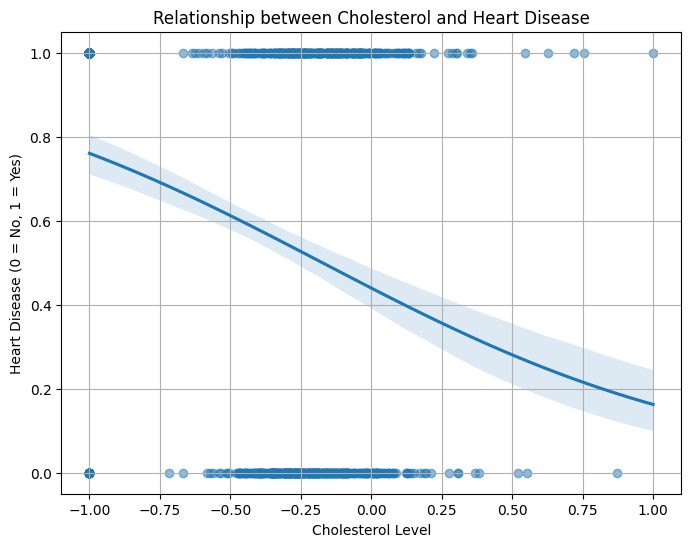

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation
correlation = df['Cholesterol'].corr(df['HeartDisease'])
print(f"Correlation between Cholesterol and HeartDisease: {correlation:.4f}")

# Visualize the relationship using a scatter plot with a logistic trendline
plt.figure(figsize=(8, 6))
sns.regplot(x='Cholesterol', y='HeartDisease', data=df, logistic=True, scatter_kws={'alpha': 0.5})
plt.title('Relationship between Cholesterol and Heart Disease')
plt.xlabel('Cholesterol Level')
plt.ylabel('Heart Disease (0 = No, 1 = Yes)')
plt.grid(True)
plt.show()


Correlation between Oldpeak and HeartDisease: 0.3924


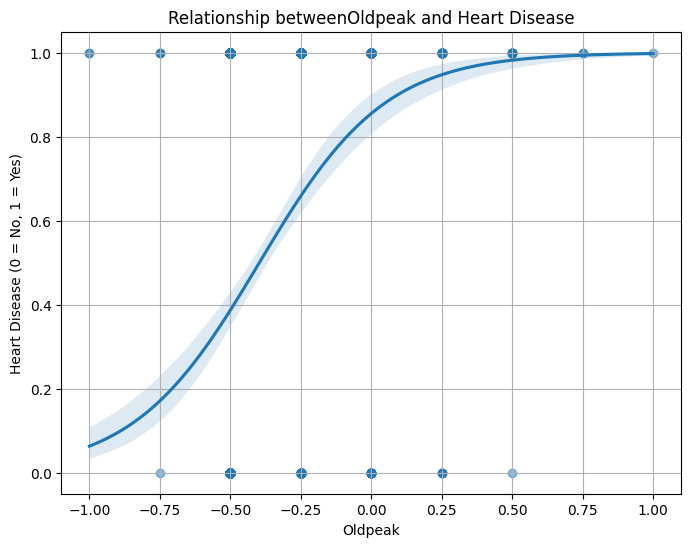

In [ ]:
correlation = df['Oldpeak'].corr(df['HeartDisease'])
print(f"Correlation between Oldpeak and HeartDisease: {correlation:.4f}")

plt.figure(figsize=(8, 6))
sns.regplot(x='Oldpeak', y='HeartDisease', data=df, logistic=True, scatter_kws={'alpha': 0.5})
plt.title('Relationship betweenOldpeak and Heart Disease')
plt.xlabel('Oldpeak')
plt.ylabel('Heart Disease (0 = No, 1 = Yes)')
plt.grid(True)
plt.show()

Correlation between ST_Slope_Up and HeartDisease: -0.6222


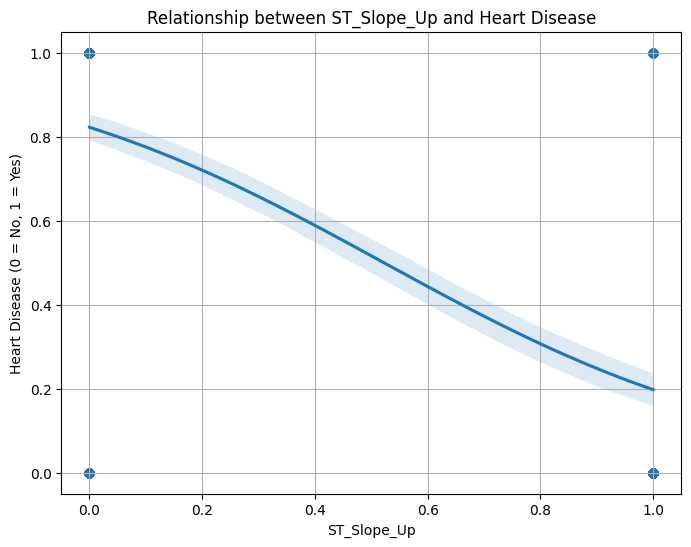

In [ ]:
correlation = df['ST_Slope_Up'].corr(df['HeartDisease'])
print(f"Correlation between ST_Slope_Up and HeartDisease: {correlation:.4f}")

# Visualize the relationship using a scatter plot with a logistic trendline
plt.figure(figsize=(8, 6))
sns.regplot(x='ST_Slope_Up', y='HeartDisease', data=df, logistic=True, scatter_kws={'alpha': 0.5})
plt.title('Relationship between ST_Slope_Up and Heart Disease')
plt.xlabel('ST_Slope_Up')
plt.ylabel('Heart Disease (0 = No, 1 = Yes)')
plt.grid(True)
plt.show()

Correlation between ST_Slope_Flat and HeartDisease: 0.5541


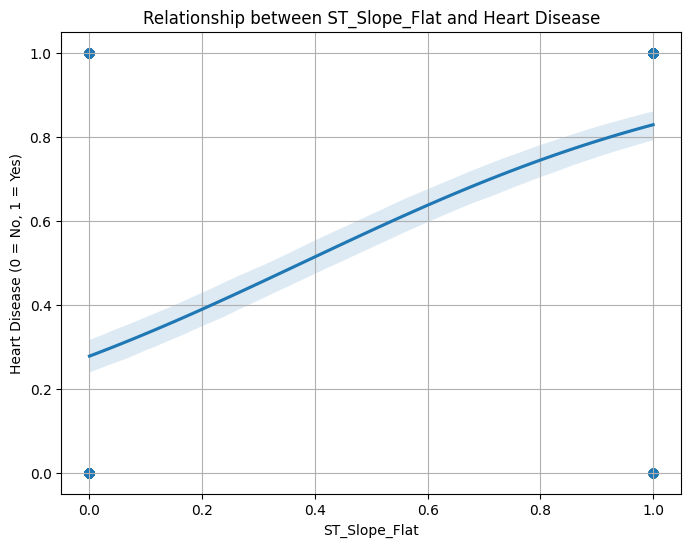

In [ ]:
correlation = df['ST_Slope_Flat'].corr(df['HeartDisease'])
print(f"Correlation between ST_Slope_Flat and HeartDisease: {correlation:.4f}")

# Visualize the relationship using a scatter plot with a logistic trendline
plt.figure(figsize=(8, 6))
sns.regplot(x='ST_Slope_Flat', y='HeartDisease', data=df, logistic=True, scatter_kws={'alpha': 0.5})
plt.title('Relationship between ST_Slope_Flat and Heart Disease')
plt.xlabel('ST_Slope_Flat')
plt.ylabel('Heart Disease (0 = No, 1 = Yes)')
plt.grid(True)
plt.show()

Correlation between ChestPainType_ATA and HeartDisease: -0.4019


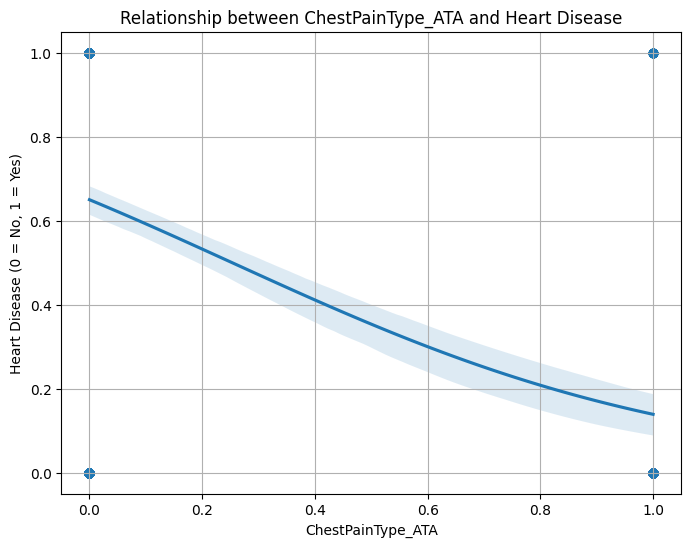

In [ ]:
# Calculate the correlation
correlation = df['ChestPainType_ATA'].corr(df['HeartDisease'])
print(f"Correlation between ChestPainType_ATA and HeartDisease: {correlation:.4f}")

# Visualize the relationship using a scatter plot with a logistic trendline
plt.figure(figsize=(8, 6))
sns.regplot(x='ChestPainType_ATA', y='HeartDisease', data=df, logistic=True, scatter_kws={'alpha': 0.5})
plt.title('Relationship between ChestPainType_ATA and Heart Disease')
plt.xlabel('ChestPainType_ATA')
plt.ylabel('Heart Disease (0 = No, 1 = Yes)')
plt.grid(True)
plt.show()

Correlation between Exercise Angina and HeartDisease: 0.4943


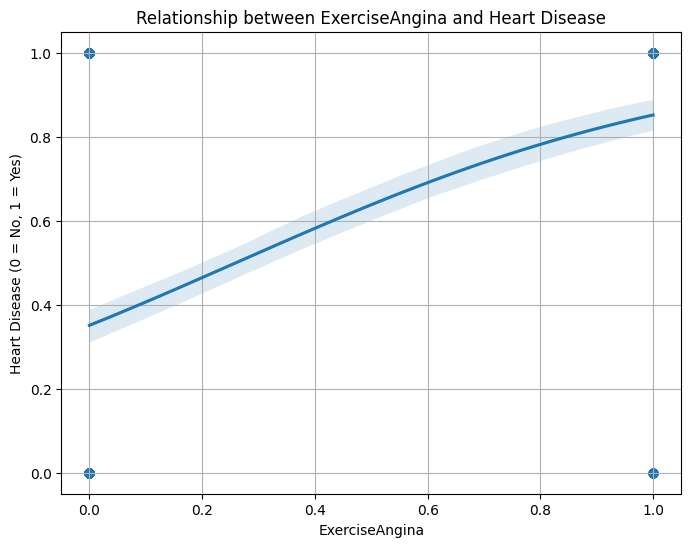

In [ ]:
# Calculate the correlation
correlation = df['ExerciseAngina'].corr(df['HeartDisease'])
print(f"Correlation between Exercise Angina and HeartDisease: {correlation:.4f}")

# Visualize the relationship using a scatter plot with a logistic trendline
plt.figure(figsize=(8, 6))
sns.regplot(x='ExerciseAngina', y='HeartDisease', data=df, logistic=True, scatter_kws={'alpha': 0.5})
plt.title('Relationship between ExerciseAngina and Heart Disease')
plt.xlabel('ExerciseAngina')
plt.ylabel('Heart Disease (0 = No, 1 = Yes)')
plt.grid(True)
plt.show()

Correlation between Exercise Angina and HeartDisease: -0.4004


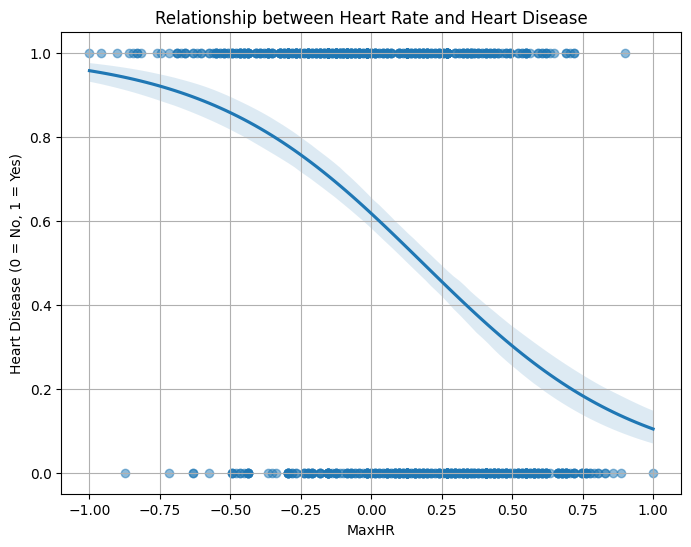

In [ ]:
# Calculate the correlation
correlation = df['MaxHR'].corr(df['HeartDisease'])
print(f"Correlation between Exercise Angina and HeartDisease: {correlation:.4f}")

# Visualize the relationship using a scatter plot with a logistic trendline
plt.figure(figsize=(8, 6))
sns.regplot(x='MaxHR', y='HeartDisease', data=df, logistic=True, scatter_kws={'alpha': 0.5})
plt.title('Relationship between Heart Rate and Heart Disease')
plt.xlabel('MaxHR')
plt.ylabel('Heart Disease (0 = No, 1 = Yes)')
plt.grid(True)
plt.show()

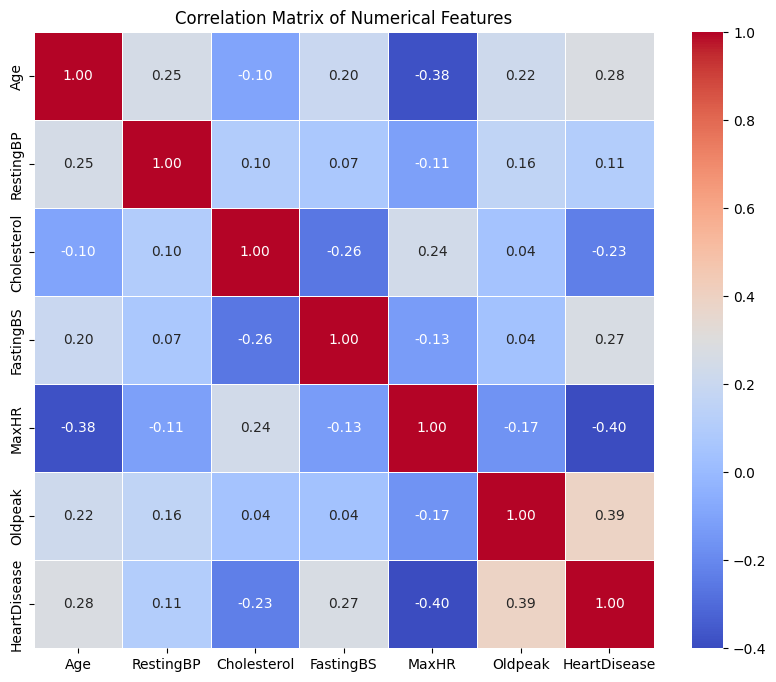

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting numerical columns for correlation analysis
numerical_features = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease']

# Compute the correlation matrix
correlation_matrix = df[numerical_features].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()


# 3.MODEL TRAINING

In [ ]:
from sklearn.model_selection import train_test_split

df = df[[col for col in df.columns if not col.endswith('_bin')]]

X = df.drop(columns=['HeartDisease','RestingBP', 'RestingECG_ST', 'RestingECG_Normal'])
y = df['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print("Column names in X:")
print(X.columns.tolist())

Column names in X:
['Age', 'Sex', 'Cholesterol', 'FastingBS', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA', 'ST_Slope_Flat', 'ST_Slope_Up']


### 3.1 Logistic Regression with gradient descent

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
X = df[['Age', 'Cholesterol']].values
y = df['HeartDisease'].values

In [ ]:
# intercept
X = np.hstack((np.ones((X.shape[0], 1)), X))

In [ ]:
# Feature scaling
X[:, 1:] = (X[:, 1:] - X[:, 1:].mean(axis=0)) / X[:, 1:].std(axis=0)

In [ ]:
#defining fucntions
weights = np.zeros(X.shape[1])
alpha = 0.01
iterations = 1000

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_cost(X, y, weights):
    m = len(y)
    h = sigmoid(np.dot(X, weights))
    cost = (-1 / m) * (np.dot(y.T, np.log(h)) + np.dot((1 - y).T, np.log(1 - h)))
    return cost

def gradient_descent(X, y, weights, alpha, iterations):
    m = len(y)
    cost_history = []

    for _ in range(iterations):
        h = sigmoid(np.dot(X, weights))
        gradient = np.dot(X.T, (h - y)) / m
        weights -= alpha * gradient
        cost = compute_cost(X, y, weights)
        cost_history.append(cost)

    return weights, cost_history

In [ ]:
# Train logistic regression model
weights, cost_history = gradient_descent(X, y, weights, alpha, iterations)

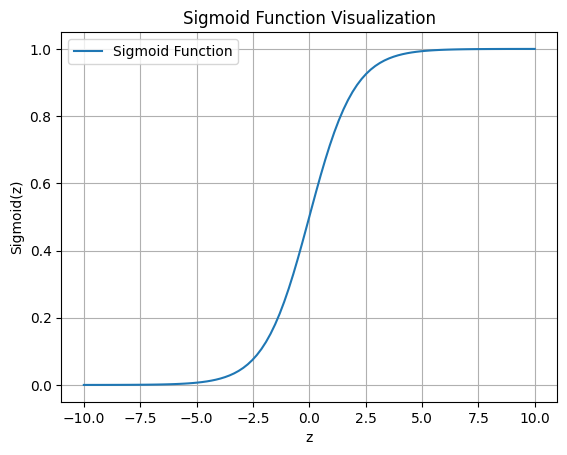

In [ ]:
z = np.linspace(-10, 10, 100)
sigmoid_values = sigmoid(z)

plt.plot(z, sigmoid_values, label="Sigmoid Function")
plt.title("Sigmoid Function Visualization")
plt.xlabel("z")
plt.ylabel("Sigmoid(z)")
plt.grid()
plt.legend()
plt.show()

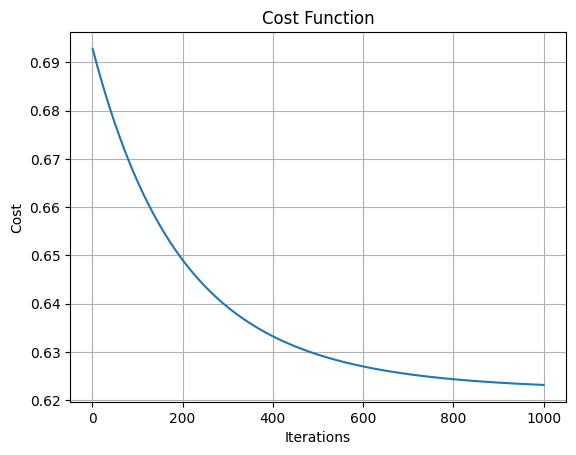

In [ ]:
plt.plot(range(1, iterations + 1), cost_history)
plt.title("Cost Function")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.grid()
plt.show()

In [ ]:
def plot_decision_boundary(X, y, weights):
    plt.figure(figsize=(8, 6))

    # Scatter plot of data points
    plt.scatter(X[:, 1], X[:, 2], c=y, cmap=plt.cm.Paired, edgecolor='k', alpha=0.8)

    # Plot decision boundary
    x_values = np.array([X[:, 1].min(), X[:, 1].max()])
    y_values = -(weights[0] + weights[1] * x_values) / weights[2]
    plt.plot(x_values, y_values, label="Decision Boundary", color="red")

    plt.xlabel("Age")
    plt.ylabel("Cholesterol")
    plt.title("Decision Boundary")
    plt.legend()
    plt.grid()
    plt.show()

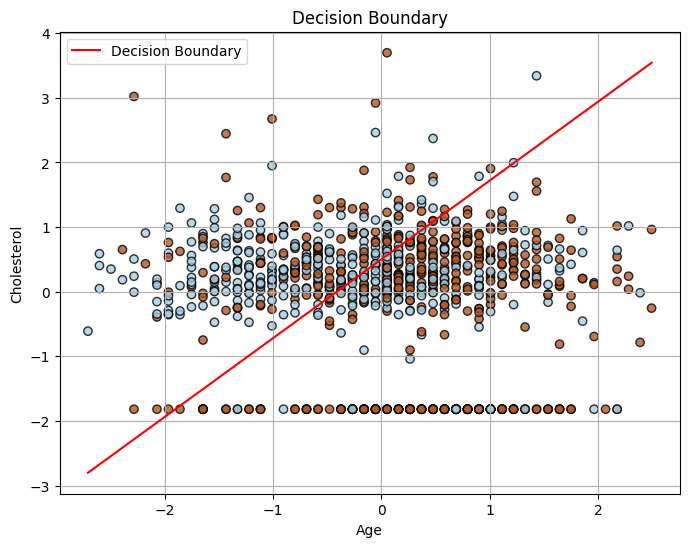

In [ ]:
plot_decision_boundary(X, y, weights)

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [ ]:
def plot_3d_contour(X, y, weights):
    x_min, x_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    y_min, y_max = X[:, 2].min() - 1, X[:, 2].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
    grid = np.c_[np.ones((xx.ravel().shape[0], 1)), xx.ravel(), yy.ravel()]
    probs = sigmoid(np.dot(grid, weights)).reshape(xx.shape)

    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    surf = ax.plot_surface(xx, yy, probs, cmap=cm.coolwarm, alpha=0.8)

    ax.scatter(X[:, 1], X[:, 2], y, c=y, cmap=plt.cm.Paired, edgecolor="k")

    ax.set_title("3D Contour Plot")
    ax.set_xlabel("Age")
    ax.set_ylabel("Cholesterol")
    ax.set_zlabel("Probability of Heart Disease")

    fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10, label="Probability")
    plt.show()

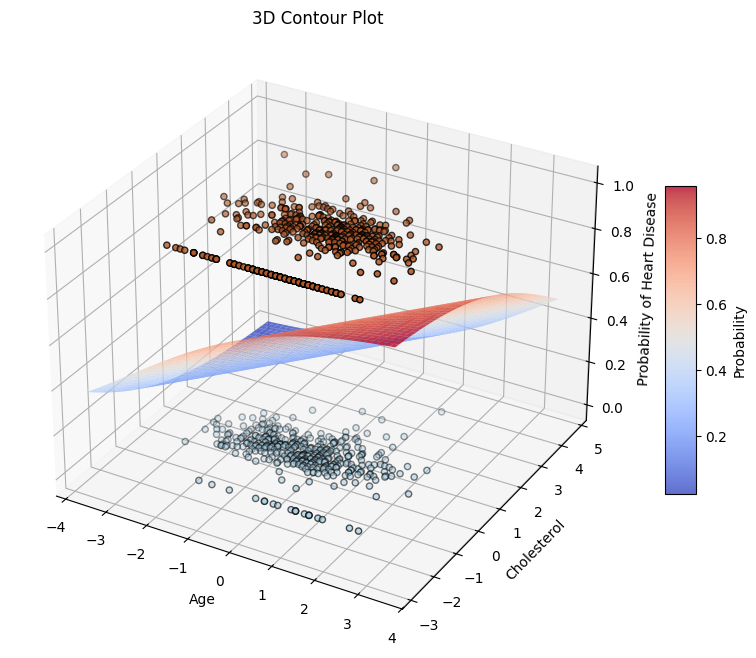

In [ ]:
plot_3d_contour(X, y, weights)

In [ ]:
import matplotlib.pyplot as plt
# Visualize the effect of different learning rates
def visualize_learning_rates(X, y, initial_weights, learning_rates, iterations):
    plt.figure(figsize=(10, 6))

    for alpha in learning_rates:
        weights = initial_weights.copy()
        cost_history = []  # To store cost at each iteration

        # Gradient Descent Loop
        for _ in range(iterations):
            h = sigmoid(np.dot(X, weights))  # Predicted probabilities
            gradient = np.dot(X.T, (h - y)) / len(y)  # Gradient
            weights -= alpha * gradient  # Update weights
            cost = compute_cost(X, y, weights)  # Compute cost
            cost_history.append(cost)  # Save cost for this iteration

        # Plot the cost history for the current learning rate
        plt.plot(range(iterations), cost_history, label=f"Alpha = {alpha}")

    # Add plot details
    plt.title("Effect of Learning Rate on Cost Function")
    plt.xlabel("Iterations")
    plt.ylabel("Cost")
    plt.legend()
    plt.grid()
    plt.show()

In [ ]:
weights = np.zeros(X.shape[1])

learning_rates = [0.01, 0.1, 0.3, 0.5]  # Test different learning rates
iterations = 100  # Number of iterations for gradient descent

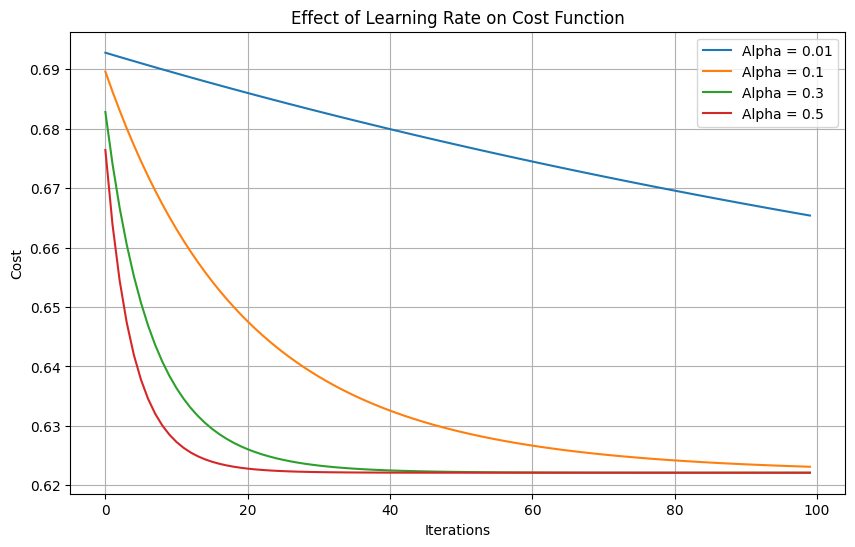

In [ ]:
visualize_learning_rates(X, y, weights, learning_rates, iterations)

In [ ]:
def compute_accuracy(X, y, weights):

    predictions = sigmoid(np.dot(X, weights))

    predicted_labels = (predictions >= 0.5).astype(int)

    accuracy = np.mean(predicted_labels == y) * 100
    return accuracy

In [ ]:
accuracy = compute_accuracy(X, y, weights)
print(f"Model Accuracy: {accuracy:.2f}%")

Model Accuracy: 55.34%


### 3.2 Ensemble Learning, using Stacking

Baseline models:

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

1) LOGISTIC REGRESSION

In [ ]:
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
lr_preds = lr.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_preds)* 100)

Logistic Regression Accuracy: 85.86956521739131


2) RANDOM FOREST

In [ ]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
rf_preds = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_preds)* 100 )

Random Forest Accuracy: 86.95652173913044


3) SVC

In [ ]:
svm = SVC(kernel='rbf', random_state=42)
svm.fit(X_train, y_train)

SVC(random_state=42)

In [ ]:
svm_preds = svm.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, svm_preds) * 100 )

SVM Accuracy: 86.95652173913044


4) GRADIENT BOOSTING

In [ ]:
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [ ]:
gb_preds = gb.predict(X_test)
print("Gradient Boosting Accuracy:", accuracy_score(y_test, gb_preds) * 100 )

Gradient Boosting Accuracy: 86.95652173913044


5) KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
knn_preds = knn.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, knn_preds)* 100 )

KNN Accuracy: 86.95652173913044


META MODEL

1) Gradient boosting

In [ ]:
import numpy as np
meta_X = np.column_stack((lr_preds, rf_preds, svm_preds, gb_preds, knn_preds))
meta_y = y_test

In [ ]:
meta_df = pd.DataFrame(meta_X, columns=['LogReg_Pred', 'RF_Pred', 'SVM_Pred', 'GB_Pred', 'KNN_Pred'])
meta_df['Target'] = meta_y

In [ ]:
meta_X_train, meta_X_test, meta_y_train, meta_y_test = train_test_split(meta_X, meta_y, test_size=0.2, random_state=42)

In [ ]:
meta_model = GradientBoostingClassifier(random_state=42)

meta_model.fit(meta_X_train, meta_y_train)

GradientBoostingClassifier(random_state=42)

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0]  # Fraction of samples used for fitting each tree
}

grid_search = GridSearchCV(estimator=meta_model,
                           param_grid=param_grid,
                           scoring='accuracy',  # Use accuracy as metric
                           cv=5,
                          n_jobs=-1)  # Use all available cores for faster search

In [ ]:
grid_search.fit(meta_X_train, meta_y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.8, 0.9, 1.0]},
             scoring='accuracy')

In [ ]:
best_meta_model = grid_search.best_estimator_
print("Best Parameters for Meta-Model:", grid_search.best_params_)

Best Parameters for Meta-Model: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 200, 'subsample': 1.0}


In [ ]:
#prediction on test data
meta_preds = best_meta_model.predict(meta_X_test)
print("Meta-Model Accuracy:", accuracy_score(meta_y_test, meta_preds) * 100 )

Meta-Model Accuracy: 86.48648648648648


Using MLP as a meta model

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
model = Sequential([
    Dense(64, activation='relu', input_shape=(meta_X.shape[1],)),  # Input layer
    Dropout(0.3),  # Prevent overfitting
    Dense(32, activation='relu'),  # Hidden layer
    Dropout(0.2),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,497 (9.75 KB)

 Trainable params: 2,497 (9.75 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',  # Use 'categorical_crossentropy' if multi-class
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    meta_X_train, meta_y_train,
    epochs=50,  # Tune as needed
    batch_size=16,
    validation_data=(meta_X_test, meta_y_test),
    verbose=1
)


Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.6367 - loss: 0.5986 - val_accuracy: 0.5135 - val_loss: 0.5549
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6530 - loss: 0.5139 - val_accuracy: 0.8649 - val_loss: 0.5232
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7892 - loss: 0.5192 - val_accuracy: 0.8649 - val_loss: 0.5078
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9084 - loss: 0.4598 - val_accuracy: 0.8649 - val_loss: 0.4990
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8740 - loss: 0.5102 - val_accuracy: 0.8649 - val_loss: 0.4924
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8683 - loss: 0.4762 - val_accuracy: 0.8649 - val_loss: 0.4860
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8778 - loss: 0.4279 - val_accuracy: 0.8649 - val_loss: 0.4753
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8755 - loss: 0.4623 - val_accuracy: 0.8649 - v

In [ ]:
meta_preds = model.predict(meta_X_test)
meta_preds_labels = (meta_preds > 0.5).astype(int)  # Convert probabilities to class labels

# Calculate accuracy
accuracy = accuracy_score(meta_y_test, meta_preds_labels)
print(f"MLP Meta-Model Accuracy on Test Data: {accuracy * 100:.2f}%")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
MLP Meta-Model Accuracy on Test Data: 86.49%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


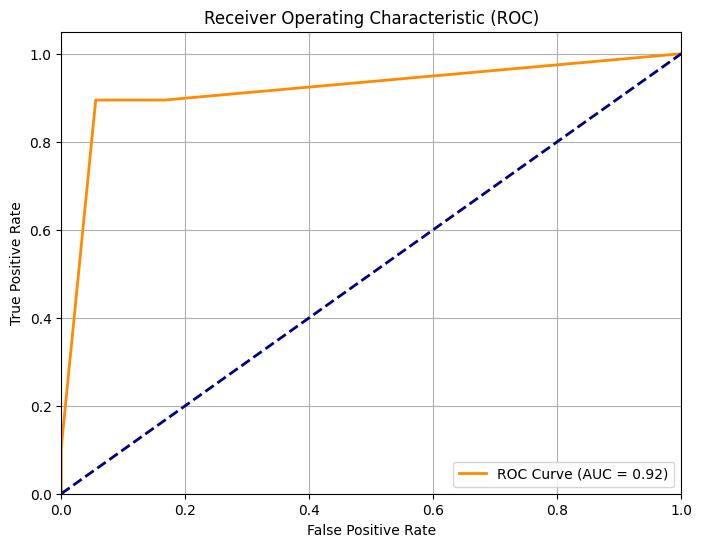

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class
y_probs = model.predict(meta_X_test).ravel()  # Use .ravel() if shape is (n,1)

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(meta_y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
